In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

<h1>Data Cleaning</h1>

In [4]:
# df = pd.read_csv("data.csv")

# https://www.kaggle.com/code/ybifoundation/purchase-prediction-micronumerosity/notebook
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Customer%20Purchase.csv')

In [5]:
df.head()

,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30,Female,School,Average,No
1,1022,68,Female,UG,Poor,No
2,1023,70,Female,PG,Good,No
3,1024,72,Female,PG,Good,No
4,1025,16,Female,UG,Average,No


In [6]:
print(f"rows: {df.shape[0]}")
print(f"columns: {df.shape[1]}")

rows: 50
columns: 6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  50 non-null     int64 
 1   Age          50 non-null     int64 
 2   Gender       50 non-null     object
 3   Education    50 non-null     object
 4   Review       50 non-null     object
 5   Purchased    50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [8]:
df.nunique()

Customer ID    50
Age            41
Gender          2
Education       3
Review          3
Purchased       2
dtype: int64

In [9]:
df.describe()

,Customer ID,Age
count,50.00000,50.000000
mean,1045.50000,54.160000
std,14.57738,25.658161
min,1021.00000,15.000000
25%,1033.25000,30.250000
50%,1045.50000,57.000000
75%,1057.75000,74.000000
max,1070.00000,98.000000


In [10]:
df = df.drop(["Customer ID"], axis=1)

<h2>Missing Value</h2>

In [11]:
df.isnull().sum()

Age          0
Gender       0
Education    0
Review       0
Purchased    0
dtype: int64

<h1>EDA</h1>

In [14]:
(df["Purchased"] == "Yes").sum() / df.shape[0]

np.float64(0.48)

In [33]:
def show_numeric(numeric_cols, n_cols=2):
    n_rows = int(np.ceil(len(numeric_cols) / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4))
    axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        sns.kdeplot(data=df, x=col, fill=True, ax=axes[i], color='skyblue')
        axes[i].set_title(col, fontsize=12)

    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

In [39]:
numeric_cols = df.select_dtypes(include=np.number).columns

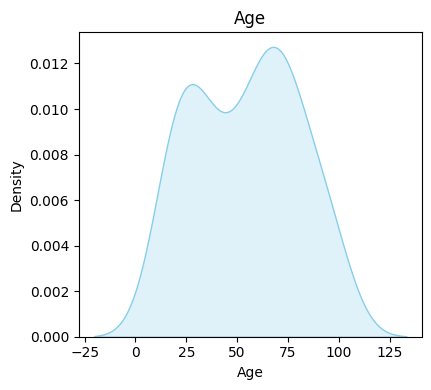

In [40]:
show_numeric(numeric_cols)

In [48]:
def show_numeric_with_target(numeric_cols, n_cols=3):
    n_rows = int(np.ceil(len(numeric_cols) / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4))
    axes = axes.flatten()

    
    for i, col in enumerate(numeric_cols):
        sns.boxplot(x='Purchased', y=col, data=df, ax=axes[i],  color='skyblue')
        # sns.regplot(data=df, x=col, y='G3', ax=axes[i],
        #             scatter_kws={'alpha':0.5, 's':40},
        #             line_kws={'color':'red'}, color='skyblue')
        axes[i].set_xlabel("Purchased")
        axes[i].set_ylabel("Age")
    
    # Remove unused subplots
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

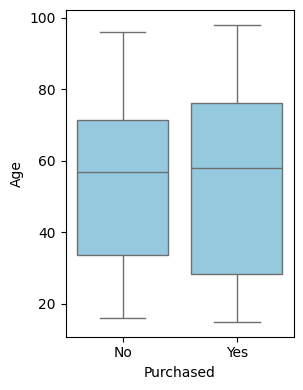

In [49]:
show_numeric_with_target(numeric_cols)

In [35]:
def show_categorical(categorical_cols, n_cols=2):
    n_rows = int(np.ceil(len(categorical_cols) / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, ax=axes[i],
                      order=df[col].value_counts().index, color='skyblue')
        axes[i].set_title(col, fontsize=12)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

In [50]:
categorical_cols = df.select_dtypes(include='object').columns

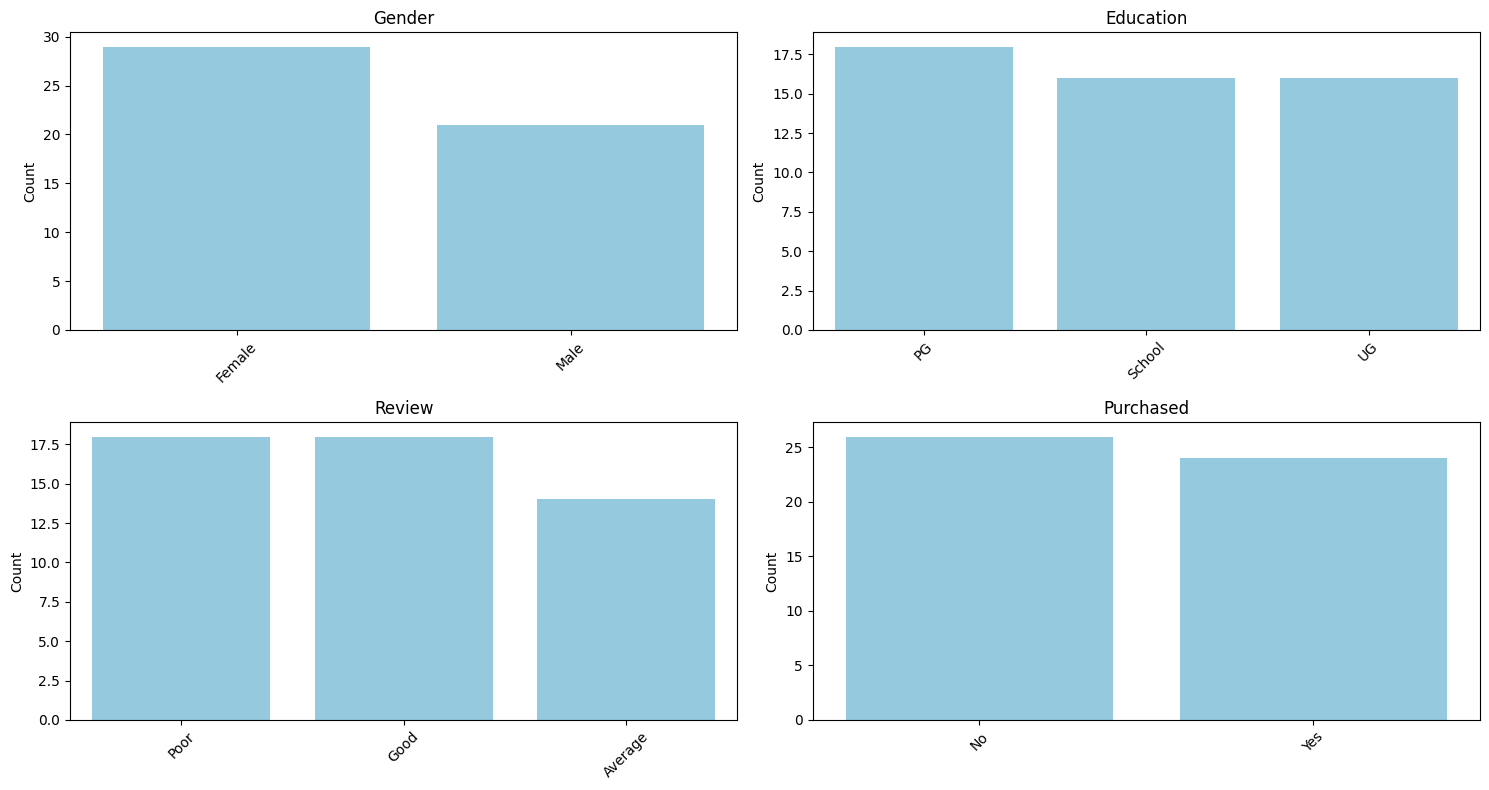

In [51]:
show_categorical(categorical_cols)

In [59]:
def show_categorical_with_target(categorical_cols, n_cols=2):
    n_rows = int(np.ceil(len(categorical_cols) / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
    axes = axes.flatten()

    cols = []
    for col in categorical_cols:
        if col != "Purchased":
            cols.append(col)
    
    for i, col in enumerate(cols):
        sns.countplot(data=df, x=col, ax=axes[i],
                      order=df[col].value_counts().index, hue="Purchased", palette="dark:skyblue")
        axes[i].set_title(col, fontsize=12)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

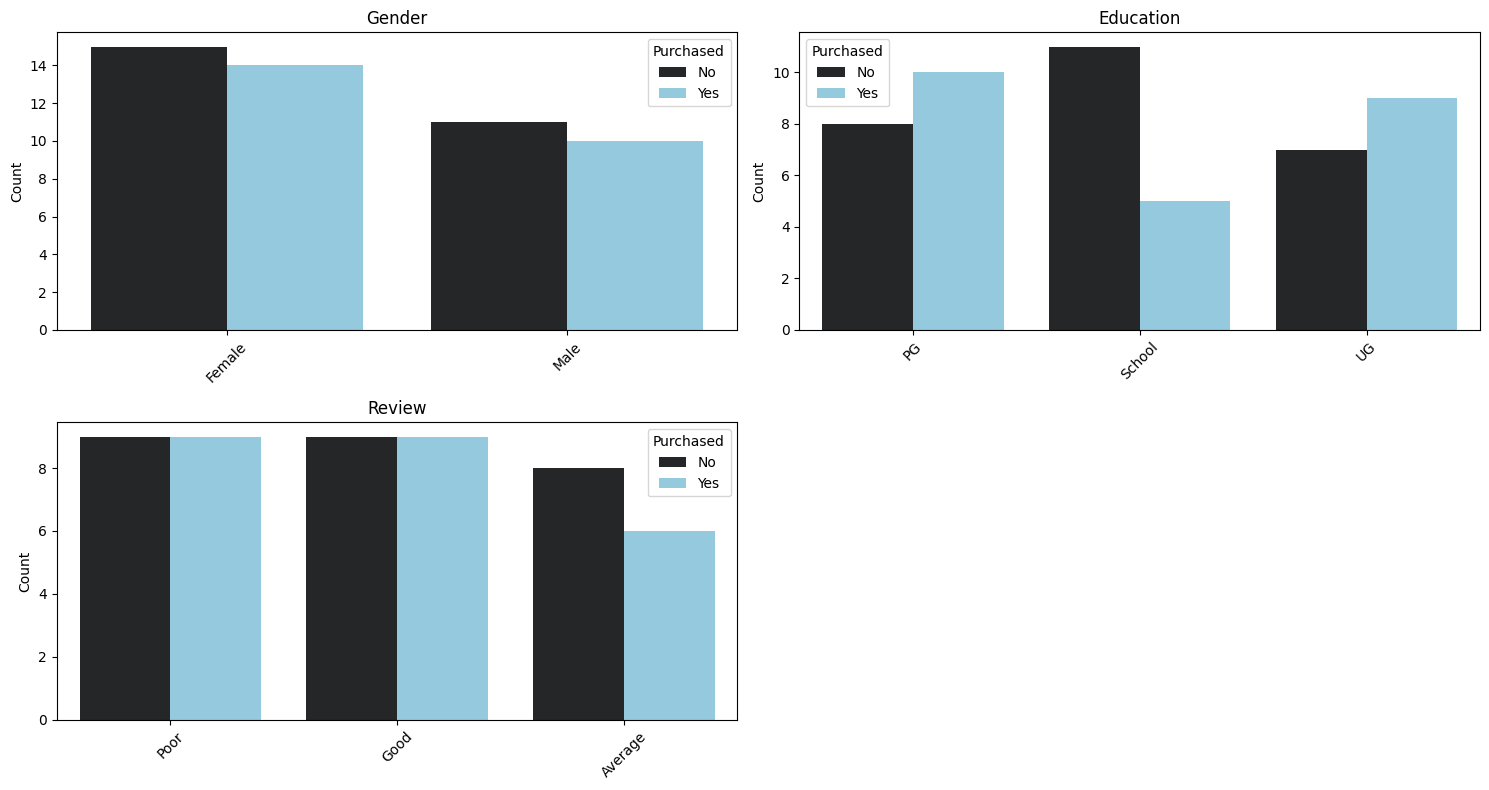

In [60]:
show_categorical_with_target(categorical_cols)

<h1>Preprocessing</h1>

In [68]:
review_mapping = {"poor": 0, "average": 1, "good": 2}

df["review_score"] = df["Review"].map(review_mapping)

In [69]:
df["Purchased"] = df["Purchased"].map({"Yes": 1, "No": 0})

In [70]:
df_encoded = pd.get_dummies(df, columns=["Gender", "Education"], drop_first=True)

In [71]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               50 non-null     int64  
 1   Review            50 non-null     object 
 2   Purchased         50 non-null     int64  
 3   review_score      0 non-null      float64
 4   Gender_Male       50 non-null     bool   
 5   Education_School  50 non-null     bool   
 6   Education_UG      50 non-null     bool   
dtypes: bool(3), float64(1), int64(2), object(1)
memory usage: 1.8+ KB


In [72]:
X_full = df_encoded.drop(["Purchased", "Review"], axis=1)
y_full = df_encoded["Purchased"]

In [76]:
def normalize_col(col):
    X_full[col]=(X_full[col]-X_full[col].mean())/X_full[col].std()

In [79]:
for col in X_full.columns:
    normalize_col(col)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (40, 5)
Test set shape: (10, 5)
